In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Importing necessary library**

In [2]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 24.1 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: keras
    Found existing installation: keras 3.1.1
    Uninstalling keras-3.1.1:
      Successfully uninstalled keras-3.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

2024-04-25 11:43:16.414285: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-25 11:43:16.414396: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-25 11:43:16.553253: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**Installing tensorflow**

**setting the image fixed size for training and intializing the batch size, channel and number of epochs**

In [4]:
!pip install split-folders

In [5]:
import splitfolders

In [6]:
splitfolders.ratio('/kaggle/input/3-kinds-of-pneumonia/Curated X-Ray Dataset', output="pneumonia", seed=1337, ratio=(.8, .1, .1))

Copying files: 9208 files [01:25, 107.42 files/s]


In [7]:
Image_Size= 224
Batch_Size = 32
Channels=3
Epochs=50

**determining number of pics and classes**

In [9]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/working/pneumonia/train",
    shuffle=True,
    image_size = (Image_Size,Image_Size),
    batch_size=Batch_Size
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/working/pneumonia/test",
    shuffle=True,
    image_size = (Image_Size,Image_Size),
    batch_size=Batch_Size
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/working/pneumonia/val",
    shuffle=True,
    image_size = (Image_Size,Image_Size),
    batch_size=Batch_Size
)

Found 7364 files belonging to 4 classes.
Found 924 files belonging to 4 classes.
Found 920 files belonging to 4 classes.


**present class name**

In [10]:
class_names = train_data.class_names
class_names

['COVID-19', 'Normal', 'Pneumonia-Bacterial', 'Pneumonia-Viral']

In [11]:
for image_batch, label_batch in train_data.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 224, 224, 3)
[3 1 2 1 3 2 2 2 1 0 0 1 1 1 1 1 0 3 2 1 2 2 3 0 1 1 1 2 1 2 0 1]


**trying out for the first image**

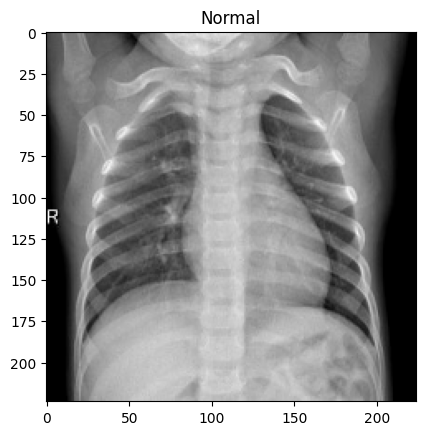

In [12]:
for image_batch, label_batch in train_data.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])

In [13]:
acc = []
model_list = []

In [14]:
n_classes = 4

In [18]:
from tensorflow.keras.applications import VGG16

input_shape = (Image_Size, Image_Size, Channels)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

model_vgg16 = models.Sequential([
    base_model,
    layers.GlobalMaxPooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
    
])

model_vgg16.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])


58889256/58889256 [==============================] - 0s 0us/step


In [19]:
history_vgg16 = model_vgg16.fit(train_data, validation_data=val_data, epochs=20)

Epoch 1/20
231/231 [==============================] - 73s 251ms/step - loss: 26.8241 - accuracy: 0.5103 - val_loss: 26.6718 - val_accuracy: 0.6804
Epoch 2/20
231/231 [==============================] - 53s 225ms/step - loss: 1350.2015 - accuracy: 0.7144 - val_loss: 3761.4629 - val_accuracy: 0.1391
Epoch 3/20
231/231 [==============================] - 53s 225ms/step - loss: 109564.6328 - accuracy: 0.3297 - val_loss: 8698766.0000 - val_accuracy: 0.3598
Epoch 4/20
231/231 [==============================] - 53s 225ms/step - loss: 1038612.0625 - accuracy: 0.3419 - val_loss: 40105600.0000 - val_accuracy: 0.2848
Epoch 5/20
231/231 [==============================] - 53s 225ms/step - loss: 701026752.0000 - accuracy: 0.3468 - val_loss: 40177760.0000 - val_accuracy: 0.3250
Epoch 6/20
231/231 [==============================] - 53s 225ms/step - loss: 865138368.0000 - accuracy: 0.4183 - val_loss: 339426.0312 - val_accuracy: 0.2967
Epoch 7/20
231/231 [==============================] - 53s 226ms/step -

In [20]:
train_score = model_vgg16.evaluate(train_data)
valid_score = model_vgg16.evaluate(val_data)
test_score = model_vgg16.evaluate(test_data)
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 30)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 30)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

29/29 [==============================] - 8s 251ms/step - loss: 296712372224.0000 - accuracy: 0.3539
Train Loss:  212850606080.0
Train Accuracy:  0.35524171590805054
------------------------------
Validation Loss:  1428741816320.0
Validation Accuracy:  0.355434775352478
------------------------------
Test Loss:  296712372224.0
Test Accuracy:  0.3538961112499237


In [21]:
acc.append(test_score[1])
model_list.append("VGG19")
print(acc, model_list)

[0.3538961112499237] ['VGG19']


In [22]:
from tensorflow.keras.applications import ResNet50

input_shape = (Image_Size, Image_Size, Channels)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

model_resnet50 = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model_resnet50.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])


94765736/94765736 [==============================] - 1s 0us/step


In [23]:
model_resnet50.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense_4 (Dense)             (None, 256)               25690368  
                                                                 
 dense_5 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 49279108 (187.98 MB)
Trainable params: 49225988 (187.78 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [24]:
history_model_resnet50 = model_resnet50.fit(train_data, validation_data=val_data, epochs=20)

Epoch 1/20
231/231 [==============================] - 85s 212ms/step - loss: 1.5571 - accuracy: 0.7754 - val_loss: 1.0647 - val_accuracy: 0.7304
Epoch 2/20
231/231 [==============================] - 47s 198ms/step - loss: 0.3685 - accuracy: 0.8491 - val_loss: 0.5185 - val_accuracy: 0.8098
Epoch 3/20
231/231 [==============================] - 47s 198ms/step - loss: 0.3404 - accuracy: 0.8601 - val_loss: 0.4333 - val_accuracy: 0.8239
Epoch 4/20
231/231 [==============================] - 47s 198ms/step - loss: 0.2748 - accuracy: 0.8850 - val_loss: 0.4136 - val_accuracy: 0.8522
Epoch 5/20
231/231 [==============================] - 47s 197ms/step - loss: 0.2193 - accuracy: 0.9083 - val_loss: 0.6464 - val_accuracy: 0.8000
Epoch 6/20
231/231 [==============================] - 47s 198ms/step - loss: 0.1868 - accuracy: 0.9318 - val_loss: 0.4676 - val_accuracy: 0.8185
Epoch 7/20
231/231 [==============================] - 47s 199ms/step - loss: 0.2663 - accuracy: 0.9067 - val_loss: 4.7233 - val_ac

In [25]:
train_score = model_resnet50.evaluate(train_data)
valid_score = model_resnet50.evaluate(val_data)
test_score = model_resnet50.evaluate(test_data)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 30)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 30)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

29/29 [==============================] - 5s 148ms/step - loss: 0.8767 - accuracy: 0.7630
Train Loss:  0.47816041111946106
Train Accuracy:  0.8422053456306458
------------------------------
Validation Loss:  0.7728018760681152
Validation Accuracy:  0.7663043737411499
------------------------------
Test Loss:  0.8766713738441467
Test Accuracy:  0.7629870176315308


In [26]:
print(acc, model_list)

[0.3538961112499237] ['VGG19']


In [27]:
acc.append(test_score[1])
model_list.append("ResNet50")
print(acc, model_list)

[0.3538961112499237, 0.7629870176315308] ['VGG19', 'ResNet50']


In [28]:
Image_Size

224

In [15]:
from tensorflow.keras.applications import EfficientNetB0

input_shape = (Image_Size, Image_Size, Channels)
n_classes = 4

densenet_base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)

model_efficientnetb0 = models.Sequential([
    densenet_base,
    layers.GlobalMaxPooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model_efficientnetb0.summary()


16705208/16705208 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 global_max_pooling2d (Glob  (None, 1280)              0         
 alMaxPooling2D)                                                 
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 4378535 (16.70 MB)
Trainable params: 4336512 (16.54 MB)
Non-trainable params: 42023 (164.16 KB)
_____________

In [16]:
model_efficientnetb0.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])


In [17]:
history_model_efficientnetb0 = model_efficientnetb0.fit(train_data, validation_data=val_data, epochs=30)

Epoch 1/30


2024-04-25 11:47:59.805285: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1714045685.184760     100 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


231/231 [==============================] - 95s 244ms/step - loss: 0.6761 - accuracy: 0.8030 - val_loss: 0.5336 - val_accuracy: 0.7750
Epoch 2/30
231/231 [==============================] - 54s 228ms/step - loss: 0.3684 - accuracy: 0.8426 - val_loss: 0.3153 - val_accuracy: 0.8717
Epoch 3/30
231/231 [==============================] - 54s 228ms/step - loss: 0.2901 - accuracy: 0.8760 - val_loss: 0.3778 - val_accuracy: 0.8435
Epoch 4/30
231/231 [==============================] - 54s 228ms/step - loss: 0.4197 - accuracy: 0.8389 - val_loss: 0.5707 - val_accuracy: 0.8391
Epoch 5/30
231/231 [==============================] - 54s 228ms/step - loss: 0.2928 - accuracy: 0.8795 - val_loss: 0.3999 - val_accuracy: 0.8554
Epoch 6/30
231/231 [==============================] - 54s 227ms/step - loss: 0.2500 - accuracy: 0.8956 - val_loss: 0.3327 - val_accuracy: 0.8717
Epoch 7/30
231/231 [==============================] - 53s 226ms/step - loss: 0.1914 - accuracy: 0.9244 - val_loss: 0.5468 - val_accuracy: 0.8

In [29]:
history_model_efficientnetb0.history

{'loss': [0.67607182264328,
  0.3684013783931732,
  0.29007360339164734,
  0.4196509122848511,
  0.2927679419517517,
  0.24998541176319122,
  0.1913726031780243,
  0.18635137379169464,
  0.15459688007831573,
  0.11721602827310562,
  0.09304513037204742,
  0.07253488153219223,
  0.08235789835453033,
  0.06564319878816605,
  0.052914269268512726,
  0.06491954624652863,
  0.050213608890771866,
  0.1040402203798294,
  0.03743072226643562,
  0.0644458755850792,
  0.04088827595114708,
  0.04293409734964371,
  0.061446547508239746,
  0.031215809285640717,
  0.04360715672373772,
  0.03178896754980087,
  0.055776361376047134,
  0.0218800101429224,
  0.03243909403681755,
  0.04089557006955147],
 'accuracy': [0.8029603362083435,
  0.8426126837730408,
  0.8760184645652771,
  0.8389462232589722,
  0.8795491456985474,
  0.895573079586029,
  0.9243617653846741,
  0.9311515688896179,
  0.9406572580337524,
  0.9557305574417114,
  0.9659152626991272,
  0.9739271998405457,
  0.9725692272186279,
  0.97623

In [30]:
train_score = model_efficientnetb0.evaluate(train_data)
valid_score = model_efficientnetb0.evaluate(val_data)
test_score = model_efficientnetb0.evaluate(test_data)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 30)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 30)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

29/29 [==============================] - 5s 141ms/step - loss: 0.4811 - accuracy: 0.9026
Train Loss:  0.013643313199281693
Train Accuracy:  0.9955187439918518
------------------------------
Validation Loss:  0.4327879250049591
Validation Accuracy:  0.907608687877655
------------------------------
Test Loss:  0.48114514350891113
Test Accuracy:  0.9025974273681641


In [31]:
acc.append(test_score[1])
model_list.append("EfficientNetB0")
print(acc, model_list)

[0.3538961112499237, 0.7629870176315308, 0.9025974273681641] ['VGG19', 'ResNet50', 'EfficientNetB0']


In [32]:
from tensorflow.keras.applications import EfficientNetB2

input_shape = (Image_Size, Image_Size, Channels)
n_classes = 4

base = EfficientNetB2(weights='imagenet', include_top=False, input_shape=input_shape)

model_efficientnetb2 = models.Sequential([
    densenet_base,
    layers.GlobalMaxPooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model_efficientnetb2.summary()


31790344/31790344 [==============================] - 0s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 global_max_pooling2d_2 (Gl  (None, 1280)              0         
 obalMaxPooling2D)                                               
                                                                 
 dense_6 (Dense)             (None, 256)               327936    
                                                                 
 dense_7 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 4378535 (16.70 MB)
Trainable params: 4336512 (16.54 MB)
Non-trainable params: 42023 (164.16 KB)
___________

In [33]:
model_efficientnetb2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])


In [34]:
history_model_efficientnetb2 = model_efficientnetb2.fit(train_data, validation_data=val_data, epochs=30)

Epoch 1/30


2024-04-25 12:53:48.009729: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


231/231 [==============================] - 90s 235ms/step - loss: 0.0696 - accuracy: 0.9829 - val_loss: 1.1227 - val_accuracy: 0.8587
Epoch 2/30
231/231 [==============================] - 54s 227ms/step - loss: 0.1356 - accuracy: 0.9724 - val_loss: 0.6246 - val_accuracy: 0.9043
Epoch 3/30
231/231 [==============================] - 53s 227ms/step - loss: 0.0172 - accuracy: 0.9940 - val_loss: 0.6505 - val_accuracy: 0.9065
Epoch 4/30
231/231 [==============================] - 54s 227ms/step - loss: 0.0133 - accuracy: 0.9957 - val_loss: 0.5798 - val_accuracy: 0.9033
Epoch 5/30
231/231 [==============================] - 54s 230ms/step - loss: 0.0141 - accuracy: 0.9951 - val_loss: 0.6319 - val_accuracy: 0.9033
Epoch 6/30
231/231 [==============================] - 54s 227ms/step - loss: 0.0271 - accuracy: 0.9917 - val_loss: 0.6748 - val_accuracy: 0.9022
Epoch 7/30
231/231 [==============================] - 54s 228ms/step - loss: 0.0085 - accuracy: 0.9970 - val_loss: 0.6633 - val_accuracy: 0.9

In [35]:
train_score = model_efficientnetb2.evaluate(train_data)
valid_score = model_efficientnetb2.evaluate(val_data)
test_score = model_efficientnetb2.evaluate(test_data)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 30)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 30)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

29/29 [==============================] - 4s 104ms/step - loss: 0.6876 - accuracy: 0.8972
Train Loss:  0.02010638825595379
Train Accuracy:  0.9937533736228943
------------------------------
Validation Loss:  0.6740439534187317
Validation Accuracy:  0.89673912525177
------------------------------
Test Loss:  0.6875787377357483
Test Accuracy:  0.8971861600875854


In [36]:
acc.append(test_score[1])
model_list.append("EfficientNetB2")
print(acc, model_list)

[0.3538961112499237, 0.7629870176315308, 0.9025974273681641, 0.8971861600875854] ['VGG19', 'ResNet50', 'EfficientNetB0', 'EfficientNetB2']


In [40]:
from tensorflow.keras.applications import MobileNetV2

input_shape = (Image_Size, Image_Size, Channels)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

model_mobilenetv2 = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model_mobilenetv2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])




In [41]:
history_model_mobilenetv2 = model_mobilenetv2.fit(train_data, validation_data=val_data, epochs=20)

Epoch 1/20
231/231 [==============================] - 59s 162ms/step - loss: 1.0236 - accuracy: 0.7746 - val_loss: 6.9477 - val_accuracy: 0.3413
Epoch 2/20
231/231 [==============================] - 37s 157ms/step - loss: 0.4331 - accuracy: 0.8281 - val_loss: 2.4991 - val_accuracy: 0.5326
Epoch 3/20
231/231 [==============================] - 38s 158ms/step - loss: 0.3917 - accuracy: 0.8441 - val_loss: 3.2255 - val_accuracy: 0.3728
Epoch 4/20
231/231 [==============================] - 38s 159ms/step - loss: 0.3300 - accuracy: 0.8595 - val_loss: 7.1460 - val_accuracy: 0.3848
Epoch 5/20
231/231 [==============================] - 38s 159ms/step - loss: 0.3536 - accuracy: 0.8543 - val_loss: 10.8056 - val_accuracy: 0.4293
Epoch 6/20
231/231 [==============================] - 37s 158ms/step - loss: 0.2862 - accuracy: 0.8795 - val_loss: 1.9900 - val_accuracy: 0.6500
Epoch 7/20
231/231 [==============================] - 38s 159ms/step - loss: 0.2841 - accuracy: 0.8804 - val_loss: 1.4742 - val_a

In [42]:
train_score = model_mobilenetv2.evaluate(train_data)
valid_score = model_mobilenetv2.evaluate(val_data)
test_score = model_mobilenetv2.evaluate(test_data)


print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 30)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 30)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])


29/29 [==============================] - 4s 94ms/step - loss: 1.0844 - accuracy: 0.8009
Train Loss:  0.5197827219963074
Train Accuracy:  0.8838946223258972
------------------------------
Validation Loss:  0.9967252612113953
Validation Accuracy:  0.8097826242446899
------------------------------
Test Loss:  1.0843698978424072
Test Accuracy:  0.8008658289909363


In [43]:
acc.append(test_score[1])
model_list.append("MobileNetV2")
print(acc, model_list)

[0.3538961112499237, 0.7629870176315308, 0.9025974273681641, 0.8971861600875854, 0.8008658289909363] ['VGG19', 'ResNet50', 'EfficientNetB0', 'EfficientNetB2', 'MobileNetV2']


**Predicting Labels for a Batch of Images**

In [44]:
from tensorflow.keras.applications import InceptionV3

input_shape = (Image_Size, Image_Size, Channels)
n_classes = 4

inceptionv3_base = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

model_inceptionv3 = models.Sequential([
    inceptionv3_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model_inceptionv3.summary()


87910968/87910968 [==============================] - 0s 0us/step
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_12 (Dense)            (None, 256)               524544    
                                                                 
 dense_13 (Dense)            (None, 4)                 1028      
                                                                 
Total params: 22328356 (85.18 MB)
Trainable params: 22293924 (85.04 MB)
Non-trainable params: 34432 (134.50 KB)
_________________________________________________________________


In [45]:
model_inceptionv3.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])


In [46]:
history_model_inceptionv3 = model_inceptionv3.fit(train_data, validation_data=val_data, epochs=30)

Epoch 1/30
231/231 [==============================] - 82s 197ms/step - loss: 0.4958 - accuracy: 0.7917 - val_loss: 3.8604 - val_accuracy: 0.6663
Epoch 2/30
231/231 [==============================] - 41s 174ms/step - loss: 0.3951 - accuracy: 0.8305 - val_loss: 0.6638 - val_accuracy: 0.7609
Epoch 3/30
231/231 [==============================] - 41s 172ms/step - loss: 0.3447 - accuracy: 0.8516 - val_loss: 2.2713 - val_accuracy: 0.7652
Epoch 4/30
231/231 [==============================] - 41s 171ms/step - loss: 0.3759 - accuracy: 0.8398 - val_loss: 0.6924 - val_accuracy: 0.7728
Epoch 5/30
231/231 [==============================] - 41s 172ms/step - loss: 0.3453 - accuracy: 0.8521 - val_loss: 0.6678 - val_accuracy: 0.7022
Epoch 6/30
231/231 [==============================] - 41s 172ms/step - loss: 0.2790 - accuracy: 0.8801 - val_loss: 0.3261 - val_accuracy: 0.8641
Epoch 7/30
231/231 [==============================] - 41s 173ms/step - loss: 0.2469 - accuracy: 0.8961 - val_loss: 0.7736 - val_ac

In [47]:
train_score = model_inceptionv3.evaluate(train_data)
valid_score = model_inceptionv3.evaluate(val_data)
test_score = model_inceptionv3.evaluate(test_data)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 30)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 30)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])


29/29 [==============================] - 6s 170ms/step - loss: 0.4123 - accuracy: 0.9004
Train Loss:  0.04322667792439461
Train Accuracy:  0.9845193028450012
------------------------------
Validation Loss:  0.4419134855270386
Validation Accuracy:  0.8999999761581421
------------------------------
Test Loss:  0.41232508420944214
Test Accuracy:  0.9004328846931458


In [48]:
acc.append(test_score[1])
model_list.append("InceptionV3")
print(acc, model_list)



[0.3538961112499237, 0.7629870176315308, 0.9025974273681641, 0.8971861600875854, 0.8008658289909363, 0.9004328846931458] ['VGG19', 'ResNet50', 'EfficientNetB0', 'EfficientNetB2', 'MobileNetV2', 'InceptionV3']


In [49]:
from tensorflow.keras.applications import DenseNet201

input_shape = (Image_Size, Image_Size, Channels)
n_classes = 4

densenet_base = DenseNet201(weights='imagenet', include_top=False, input_shape=input_shape)

model_densenet = models.Sequential([
    densenet_base,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model_densenet.summary()


74836368/74836368 [==============================] - 1s 0us/step
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 flatten_3 (Flatten)         (None, 94080)             0         
                                                                 
 dense_14 (Dense)            (None, 256)               24084736  
                                                                 
 dense_15 (Dense)            (None, 4)                 1028      
                                                                 
Total params: 42407748 (161.77 MB)
Trainable params: 42178692 (160.90 MB)
Non-trainable params: 229056 (894.75 KB)
_________________________________________________________________


In [50]:
model_densenet.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])


In [51]:
history_model_densenet = model_densenet.fit(train_data, validation_data=val_data, epochs=20)

Epoch 1/20
231/231 [==============================] - 208s 390ms/step - loss: 1.7639 - accuracy: 0.6973 - val_loss: 128.7908 - val_accuracy: 0.4815
Epoch 2/20
231/231 [==============================] - 77s 329ms/step - loss: 0.5035 - accuracy: 0.7994 - val_loss: 0.4348 - val_accuracy: 0.8217
Epoch 3/20
231/231 [==============================] - 77s 329ms/step - loss: 0.4068 - accuracy: 0.8311 - val_loss: 0.4719 - val_accuracy: 0.8196
Epoch 4/20
231/231 [==============================] - 77s 329ms/step - loss: 0.3738 - accuracy: 0.8442 - val_loss: 0.3707 - val_accuracy: 0.8478
Epoch 5/20
231/231 [==============================] - 77s 329ms/step - loss: 0.3376 - accuracy: 0.8589 - val_loss: 0.3792 - val_accuracy: 0.8413
Epoch 6/20
231/231 [==============================] - 77s 329ms/step - loss: 0.3091 - accuracy: 0.8662 - val_loss: 0.3869 - val_accuracy: 0.8478
Epoch 7/20
231/231 [==============================] - 77s 328ms/step - loss: 0.6091 - accuracy: 0.8221 - val_loss: 1.3822 - val

In [52]:
train_score = model_densenet.evaluate(train_data)
valid_score = model_densenet.evaluate(val_data)
test_score = model_densenet.evaluate(test_data)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 30)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 30)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

29/29 [==============================] - 9s 281ms/step - loss: 0.3955 - accuracy: 0.8452
Train Loss:  0.25938108563423157
Train Accuracy:  0.8849809765815735
------------------------------
Validation Loss:  0.37094759941101074
Validation Accuracy:  0.852173924446106
------------------------------
Test Loss:  0.3955046832561493
Test Accuracy:  0.8452380895614624


In [63]:
model_list[0] = "VGG16"

In [62]:
acc.append(test_score[1])
model_list.append("DenseNet201")
print(acc, model_list)

[0.3538961112499237, 0.7629870176315308, 0.9025974273681641, 0.8971861600875854, 0.8008658289909363, 0.9004328846931458, 0.8452380895614624] ['VGG16', 'ResNet50', 'EfficientNetB0', 'EfficientNetB2', 'MobileNetV2', 'InceptionV3', 'DenseNet201']


In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()

In [55]:
gen_testing = datagen.flow_from_directory(
    "/kaggle/working/pneumonia/test",
    target_size=(224, 224),
    batch_size=20
)

Found 924 images belonging to 4 classes.


In [56]:
from PIL import Image
y_actual_path = gen_testing.filepaths
y_actual = gen_testing.labels
from sklearn.metrics import accuracy_score

In [57]:
acc_test = []

In [64]:
model_list

['VGG16',
 'ResNet50',
 'EfficientNetB0',
 'EfficientNetB2',
 'MobileNetV2',
 'InceptionV3',
 'DenseNet201']

In [65]:
model_name_list = [model_vgg16,model_resnet50,model_efficientnetb0,model_efficientnetb2,model_mobilenetv2,model_inceptionv3,model_densenet]

In [ ]:
y_actual_path

In [67]:
image_path = '/kaggle/working/pneumonia/test/Pneumonia-Bacterial/Pneumonia-Bacterial (2610).jpg'
image = Image.open(image_path)
img = image.resize((224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Make predictions
predictions = model_efficientnetb0.predict(img_array)
class_labels = class_names
score = tf.nn.softmax(predictions[0])
max_index = np.array(predictions).argmax()
target = class_labels[max_index]
print(max_index)

1/1 [==============================] - 2s 2s/step
2


In [68]:
for md in model_name_list:
    y_pred = []
    for image_path in y_actual_path:
        image = Image.open(image_path)
        img = image.resize((224, 224))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)

        # Make predictions
        predictions = md.predict(img_array)
        class_labels = class_names
        score = tf.nn.softmax(predictions[0])
        max_index = np.array(predictions).argmax()
        target = class_labels[max_index]
        y_pred.append(max_index)
    acc_test.append(accuracy_score(y_actual,y_pred))

1/1 [==============================] - 0s 40ms/step


In [69]:
acc_test

[0.32575757575757575,
 0.7294372294372294,
 0.9145021645021645,
 0.908008658008658,
 0.8084415584415584,
 0.8993506493506493,
 0.8333333333333334]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

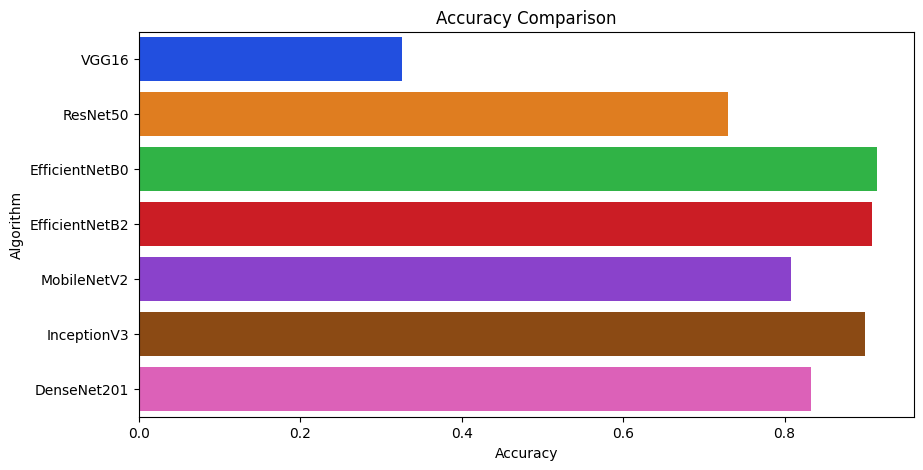

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc_test,y = model_list,palette='bright')

In [71]:
accuracy_models = dict(zip(model_list, acc_test))
for k, v in accuracy_models.items():
    print (k, '-->', v)
     

VGG16 --> 0.32575757575757575
ResNet50 --> 0.7294372294372294
EfficientNetB0 --> 0.9145021645021645
EfficientNetB2 --> 0.908008658008658
MobileNetV2 --> 0.8084415584415584
InceptionV3 --> 0.8993506493506493
DenseNet201 --> 0.8333333333333334


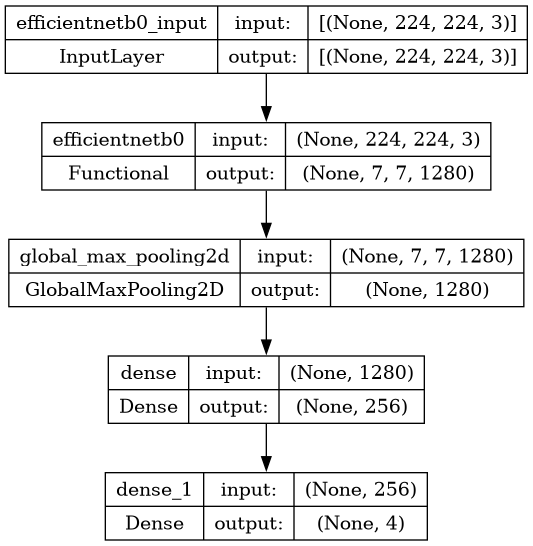

In [72]:
from tensorflow.keras.utils import plot_model
plot_model(model_efficientnetb0, show_shapes=True, to_file='cnn_model.png')

In [73]:
import matplotlib.pyplot as plt

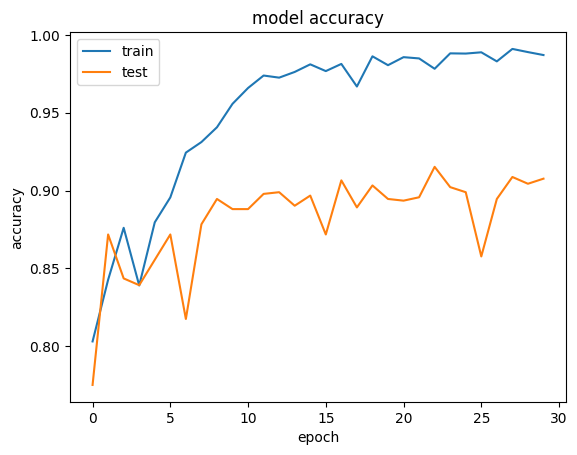

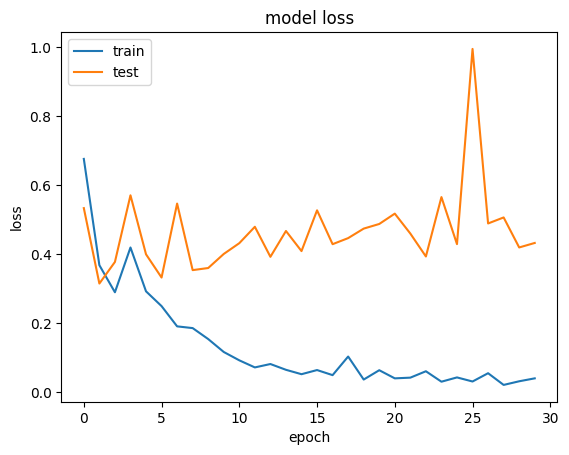

In [74]:
plt.plot(history_model_efficientnetb0.history['accuracy'])
plt.plot(history_model_efficientnetb0.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_model_efficientnetb0.history['loss'])
plt.plot(history_model_efficientnetb0.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [75]:
y_pred = []
for image_path in y_actual_path:
    image = Image.open(image_path)
    img = image.resize((224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    # Make predictions
    predictions = model_efficientnetb0.predict(img_array)
    class_labels = class_names
    score = tf.nn.softmax(predictions[0])
    max_index = np.array(predictions).argmax()
    target = class_labels[max_index]
    y_pred.append(max_index)

1/1 [==============================] - 0s 26ms/step


In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_actual, y_pred,digits=4, target_names=class_names))

                     precision    recall  f1-score   support

           COVID-19     0.9922    0.9922    0.9922       129
             Normal     0.9755    0.9755    0.9755       327
Pneumonia-Bacterial     0.9003    0.8704    0.8851       301
    Pneumonia-Viral     0.7684    0.8144    0.7907       167

           accuracy                         0.9145       924
          macro avg     0.9091    0.9131    0.9109       924
       weighted avg     0.9159    0.9145    0.9150       924



In [77]:
from sklearn.metrics import confusion_matrix


result = confusion_matrix(y_actual, y_pred)

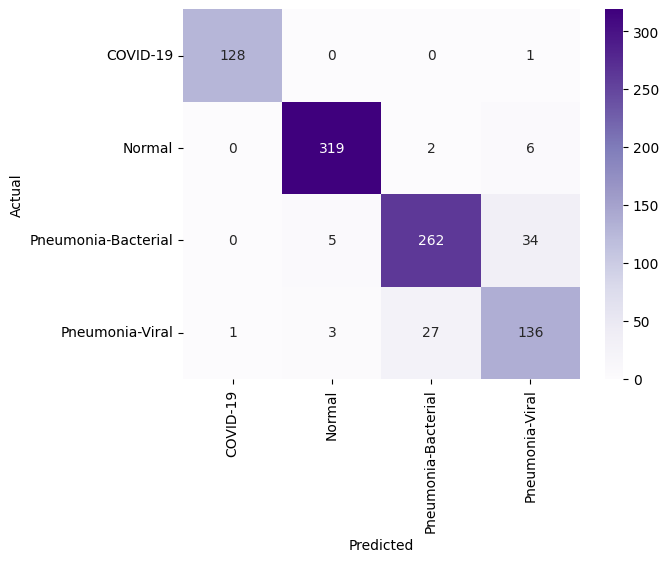

In [78]:
import pandas as pd
import seaborn as sns
label_names= class_names
df_cm = pd.DataFrame(result, columns=label_names, index=label_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Purples", annot=True, fmt='.0f'); # font size


In [79]:
model_efficientnetb0.save("pneumonia4efficientnetb0.h5")

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [80]:
model_efficientnetb2.save("pneumonia4efficientnetb2.h5")

In [81]:
model_inceptionv3.save("pneumonia4inceptionv3.h5")

**Image Prediction Function Using the Model**

In [82]:
def pred(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [83]:
from tensorflow.keras.models import load_model

In [84]:
test_model = load_model('/kaggle/working/pneumonia4efficientnetb0.h5')

# Show the model architecture
test_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 global_max_pooling2d (Glob  (None, 1280)              0         
 alMaxPooling2D)                                                 
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 4378535 (16.70 MB)
Trainable params: 4336512 (16.54 MB)
Non-trainable params: 42023 (164.16 KB)
_________________________________________________________________


In [85]:
train_score = test_model.evaluate(train_data)
valid_score = test_model.evaluate(val_data)
test_score = test_model.evaluate(test_data)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 30)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 30)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

29/29 [==============================] - 4s 102ms/step - loss: 0.4347 - accuracy: 0.9026
Train Loss:  0.017136970534920692
Train Accuracy:  0.9949755668640137
------------------------------
Validation Loss:  0.4019971191883087
Validation Accuracy:  0.897826075553894
------------------------------
Test Loss:  0.43467408418655396
Test Accuracy:  0.9025974273681641


In [86]:
y_pred = []
for image_path in y_actual_path:
    image = Image.open(image_path)
    img = image.resize((224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    # Make predictions
    predictions = test_model.predict(img_array)
    class_labels = class_names
    score = tf.nn.softmax(predictions[0])
    max_index = np.array(predictions).argmax()
    
    #target = class_labels[max_index]
    y_pred.append(max_index)

1/1 [==============================] - 0s 26ms/step


In [87]:
from sklearn.metrics import classification_report

In [88]:
print(classification_report(y_pred,y_actual, digits=4))

              precision    recall  f1-score   support

           0     0.9922    0.9922    0.9922       129
           1     0.9755    0.9755    0.9755       327
           2     0.8704    0.9003    0.8851       291
           3     0.8144    0.7684    0.7907       177

    accuracy                         0.9145       924
   macro avg     0.9131    0.9091    0.9109       924
weighted avg     0.9139    0.9145    0.9140       924

